In [ ]:
# SPDX-FileCopyrightText: 2023 Machine-Learning-OER-Collection
# SPDX-License-Identifier: CC-BY-4.0

### Example code for a decision tree classification

Welcome back! After introducing the data (see [EDA](/supervised_learning/Exploratory_data_analysis.ipynb)), we will now look at a decision tree classifier.

The model:

Decision trees are used for classification and regression. This tutorial focuses on classification. As mentioned, your goal is to create a model that predicts if a car purchased at an auction is a bad buy. Before we start training the model, let's see what a decision tree classifier does. 
A decision tree predicts the value of a target variable by learning simple decision rules (if/else) inferred from the data features.

To understand how the if/else questions lead to a tree structure, let's have a look at this simple example:

<img src="../img/decision_tree.svg" alt='Example Decision Tree' height="500" width='1000'>

The feature is the questions if the vehicle is older than five years. If this case is _True_, the next question to the left, which would be the next feature, follows. The same applies if the car is younger than five years. Then another question, meaning another feature, is considered. The questions are asked until all samples are assigned to a final decision: Buy or Don't Buy. 


A decision tree consists of a root, edges, nodes and leaf nodes:
A root has nodes, a node always has an ancestor and descendants, and a leaf has no descendants.  

<img src="../img/decision_tree_classifier.svg" alt="Decision Tree Classifier" height="500" width="1000">

The building process of a decision tree is based on a test performed on the root and each node until a termination condition is reached. 

If we apply this to our data set, we use part of it as a training set to train the data. The training set is recursively split into subsets. Each of these splits represents a node in the decision tree. How exactly the split is done (i.e. which question is asked) depends on the parameters/implementation of the algorithm.

The termination condition can be:
- the maximum depth of the tree is reached
- the number of samples in a node is below a certain threshold
- the number of samples in a node is 0
- the node is pure (all samples belong to the same class)

The output of a decision tree classifier is a class. 

See [Decision Trees](https://scikit-learn.org/stable/modules/tree.html#decision-trees) in the scikit-learn User Guide for more information about the algorithm.


Reference:

Example code for a decision tree model by julia from the repo [machine-learning-OER-Basics](https://github.com/Machine-Learning-OER-Collection/Machine-Learning-OER-Basics) is licensed under [CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/).

We'll start with a basic pipeline which includes the following steps:

## Basic Machine Learning Pipeline

- Load libraries
- Import data set
- Preprocessing
    - Encoding categorical variables
- Split the data set into training and testing sets
- Instantiate the Classifier specifying hyperparameters
- Train the Classifier on the training data
- Evaluate the performance of the Classifier

**The structure of the notebook follows first the basic pipeline. The topic imbalanced data set is covered in a separate step.**

Steps:

1. Preparation of the data set:

     - Encode categorical values to numerical (OneHotEncoding)

<br>

2. Training of the data:
    - Split the data into training and testing sets
    - Instantiate the Classifier specifying hyperparameters
    - Train the Classifier on the training data

<br>

3. Evaluate the performance of the Classifier
    - Classification report

##### Used libraries in the code:
* [pandas](https://pandas.pydata.org/docs/index.html#) for data analyzing
* [scikit-learn](https://scikit-learn.org/stable/index.html) for machine learning
* [seaborn](https://seaborn.pydata.org/) for statistical data visualization
* [matplotlib](https://matplotlib.org/) for data visualization
* [RandomUnderSampler](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html#randomundersampler) for resampling the data

From sklearn:

`from sklearn.preprocessing import OneHotEncoder`

`from sklearn.model_selection import train_test_split`

`from sklearn.tree import DecisionTreeClassifier`

`from sklearn.metrics import classification_report`

__________________________________________________


**Read in the data set**

Read in the data set: We'll use the cleaned data set from the EDA for this tutorial.

Check for missing values: This downloaded example data set uses question marks ("?") for missing values. The parameter na_values converts the question marks to the format NaN (not a number), which pandas can detect. By using the data set from the EDA, the missing values are already handled.

In [1]:
import pandas as pd

df = pd.read_csv('../../../kick_after_EDA.csv')

In [2]:
# Display the data frame
pd.set_option('display.max_columns', None) # if not set, displayed columns will be truncated
df.head(2)

,IsBadBuy,PurchDate,Auction,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,CurrentAuctionAveragePrice,CurrentAuctionCleanPrice,CurrentRetailAveragePrice,CurrentRetailCleanPrice,BYRNO,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,0,1260144000,ADESA,3,MAZDA,MAZDA3,i,4D SEDAN I,RED,AUTO,Alloy,89046,OTHER ASIAN,MEDIUM,OTHER,7451.0,8552.0,11597.0,12409.0,21973,FL,7100.0,0,1113
1,0,1260144000,ADESA,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,AUTO,Alloy,93593,AMERICAN,LARGE TRUCK,CHRYSLER,7456.0,9222.0,11374.0,12791.0,19638,FL,7600.0,0,1053


# Basic Pipeline

<span style="background-color:#648FFF">Excursion</span>  

**Data Leakage**

To avoid [data leakage](https://scikit-learn.org/stable/common_pitfalls.html#data-leakage), the data set is split into training and testing sets before any preprocessing. The training set is used to train the model and the testing set is used to evaluate the model. 

Test data should never be used to make decisions about the model. A customary practice is to never run `fit` on the test data.

Data leakage can lead to the development of invalid machine learning models due to over-optimization of the applied model. It occurs when the model's learning process uses external data, i.e., data that is not included in the training data set. The accuracy and reliability of the calculated estimated performance of the model can be affected by this additional information learned by the model - [more information here](https://www.semanticscholar.org/paper/Data-Wrangling-and-Data-Leakage-in-Machine-Learning-Saravanan-Sathish/d9c6b6f77fa966f9b3587c2bac3b5c3582537ce6).

However, we want to encode the categories in this basic pipeline beforehand. For class 1, we have only a few data points on some attributes. When splitting, we want to take all categories into account, which may not be the case with a small number of samples. In such cases, it can make sense to code beforehand. 

**Feature Scaling**

If you want to compare several features, it is necessary to switch off the different feature dimensions. This is usually done by scaling the feature. However, this is not used for a decision tree since it is decided whether a value meets a certain condition (e.g., price more than $10,000). Which scaling the respective feature has, is then rather irrelevant. However, scikit-learn has a [method for this](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing).

The scaling of the features plays an essential role in different models. The features often have different value ranges, e.g., 0 to 1 or -1,000 to 1,000. The influence of a feature on the prediction depends directly on its value range - the larger the value range, the stronger the effect on the prediction. In a sense, the value ranges can be considered as weights.

However, it is usually preferable to initially weight all features equally. To achieve this goal, it is necessary to transform all features into a comparable value range. In the case of decision trees, however, scaling is unnecessary since the algorithm merely divides the data into branches according to certain conditions. 

<span style="background-color:#648FFF">*********</span> 

### First step

#### Encode the categorical values | One-Hot-Encoding

As scikit-learn states in the documentation, their Decision Tree implementation does not provide support for categorical variables at this time. To use both - numerical and categorical features - for the algorithm, the categorical values must be transformed into numeric values. Depending on the data type, the [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn-preprocessing-onehotencoder), [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html#sklearn-preprocessing-ordinalencoder), or [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) comes in helpful. (NOTE: Use LabelEncoder only for the target variable! The target variable for this data set is numerical, so no need for encoding.)

First, we import the OneHotEncoder from `sklearn.preprocessing`. Next, we determine the categorial features and assign them to a new data frame. 

In [3]:
from sklearn.preprocessing import OneHotEncoder

# Define the categorical features
categorical_features = ['Auction', 'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission',
       'WheelType', 'Nationality', 'Size', 'TopThreeAmericanName', 'VNST']

# Write categorical columns to new df
categorical_data = df[categorical_features]

Now, we assign the OneHotEncoder to the variable encoder. The `fit()` method of the encoder is used to train the categorical features. Finally, we use the `transform()` method to transform the categorical features into numerical features.

In [4]:
# Assign OneHotEncoder to variable
encoder = OneHotEncoder()

# Encoder learns the categories
encoder.fit(categorical_data)

# Transform categorical data into encoded array
encoded_data = encoder.transform(categorical_data)

Create a data frame with encoded data

The method `toarray()` converts the encoded data into a numpy array. The array is then converted into a data frame with `pd.DataFrame()`. The column names are extracted from the encoder with `get_feature_names_out()`.

By using the `concat()` method, the encoded data is concatenated with the original data set. The original columns are dropped with the `drop()` method.

In [5]:
# Create data frame
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(categorical_features))

# Concatenate the encoded df with the remaining columns of original data frame
df_encoded = pd.concat([df.drop(categorical_features, axis=1), encoded_df], axis=1)
print(f'Amount of features after using OneHotEncoder: {len(df_encoded.columns)}')

Amount of features after using OneHotEncoder: 2144


The OneHotEncode method converts the categorical values to numerical values. The method creates a new column for each category and assigns a 1 or 0 to the column. The 1 represents the existence of the category, the 0 represents the non-existence. We have 12 categorical features in our data set, all with many different values. 

Let's look again at the example of VNST to see why the data set now has 2,144 features instead of 23. The VNST column consists of 37 individual values. For each of these values, a single column is created, a column for VNST_MD (Maryland), a column for VNST_OR (Oregon) and so on until each value has its own column. And this continues for all other categorical columns.

In [6]:
df['VNST'].value_counts().count()

37


Dimensionality reduction is not covered in this notebook for now. You can find more information on [methods here](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) or create a notebook and contribute to this repository.

**Split the target variable (y) from the features (X)**

The [Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) takes X and y as input. The target variable (y) is the variable that should be predicted. The features (X) are the variables used to predict the target variable. 
Both, X and y are numpy arrays or sparse matrices of shape (n_samples, n_features), where n_samples is the number of samples and n_features is the number of features. A numpy array is a grid of values, all of the same type. 

In [7]:
# Split the encoded data frame into X and y
X = df_encoded.drop('IsBadBuy', axis=1) # Drop the target column from the features
y = df_encoded['IsBadBuy']

### Second step - Training of the data

Split the data into training and testing sets

The [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function splits the data set into training and test sets. The test_size parameter specifies the proportion of the test set. You can also split the data set into 25% test and 75% training data by setting the parameter to 0.25. If you use the default parameters, you're all set for the first run, so don't worry.

The random_state parameter ensures that the split is always the same. You can set it to any integer (but always the same). If you don't set the parameter, the split will differ each time you run the code. We'll decide to set the parameter to 42. If you don't know why, a quick search on the web will help. The same goes for questions about the code. Stackoverflow is a good place to start.

X_train and y_train are the _training_ sets for the features and the target variable. X_test and y_test are the _test_ sets for the features and the target variable.

In [8]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
from collections import Counter

print(f'Training set shape {Counter(y_train)}')
print(f'Testing set shape {Counter(y_test)}')

Training set shape Counter({0: 42568, 1: 5982})
Testing set shape Counter({0: 20988, 1: 2926})


**Train the Decision Tree Classifier**

You are almost there to see the first results of your model. The next step is to train your model. 
Let's go line by line through the code:

We import the DecisionTreeClassifier from sklearn.tree. 

Instantiate the Classifier specifying parameters: The DecisionTreeClassifier has many parameters. We'll use almost all of the default parameters for now. You can find more information about the parameters in the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier).
Merely for max_depth, a value of 4 and for random_state, a value of 42 is set to ensure the results are reproducible.

Let's dive into the parameters we set:

* The `criterion` parameter is set to gini. The default value is gini, so we could have omitted it. The criterion parameter determines the function to measure the quality of a split. Supported criteria are _gini_ for Gini impurity, entropy, and log_loss for information gain. We'll explain Gini impurity below; for the other criteria, see the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier).

* The parameter `splitter` is set to _best_. We choose the greedy approach, meaning we want the best possible partitioning at each step. Note, that the features are randomly permuted at each split. 

* The `max_depth` parameter is set to 4. The default is None, which would branch out the maximum tree. If the parameter is None, the nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. See the [Overfitting](/supervised_learning/classification/k_nearest_neighbors/text/overfitting_underfitting.md) section for why limiting the tree's depth makes sense.

* `min_samples_split` is set to the default value of 2 to ensure each node has at least two samples to split.

* We set the `min_samples_leaf` to the default value of 1 to ensure each leaf has at least one sample.

* `min_weight_fraction_leaf` is set to the default value of 0.0. This parameter is used to specify the minimum weighted fraction of the sum of the weights (of all input samples) required to be at a leaf node. Samples have identical weights if sample_weight is not specified.

* `max_features` is set to the default value of None. This parameter determines the number of features to consider for the best split. If we chose None, then all features are considered. 

* We set the `random_state` to the integer 42. The random_state regulates the randomness of the estimator. Regardless of whether we set the splitter to 'best', the features are consistently randomized during each split. Suppose the number of selected features (max_features) is less than the total number of features (n_features). In that case, the algorithm will randomly select max_features at each split before identifying the best split among them. However, even when max_features equals n_features, the best split found may differ across different runs. This occurs when multiple splits lead to identical criterion improvements and a random selection must be made. To ensure consistent behavior during the fitting process, it is necessary to set the random_state parameter to a fixed integer value.

* `max_leaf_nodes` is set to the default value of None. This parameter is used to specify the maximum number of leaf nodes. The default value of None means that the number of leaf nodes is unlimited.

* The parameter `min_impurity_decrease` determines whether a node should be split based on the impurity reduction the split would cause. The node will be partitioned if the impurity decrease induced by a split is greater than or equal to the specified value.

* We leave the `class_weight` to None. This parameter is used to specify the weight of each class. If we chose None, the classes are supposed to have weight one. 

* For `ccp_alpha`, we leave the default value of 0.0. The complexity parameter, referred to as ccp_alpha, is a parameter used to control the pruning of decision tree subtrees. Pruning is a technique used to prevent overfitting in decision trees by reducing the complexity of the tree. By default, no pruning is performed, which means that the decision tree grows without any constraints on complexity. 

As mentioned, if you use the default parameters, you don't need to specify them in the DecisionTreeClassifier.

In [10]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=4, random_state=42)

And now we train the model. The `fit()` method trains the model on the training data X_train and y_train.

In [11]:
# Fit model to training set
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

The method `predict()` predicts the target variable for the test data X_test. The predicted values are assigned to the variable `y_pred`.

In [12]:
# Predict test set labels
y_pred = model.predict(X_test)

In order to understand the decision rules, let's have a closer look at the rules and structure. We use a simplified model for this:

There are various ways to visualize the constructed decision tree, as a plot or in text form. The plot_tree function from sklearn.tree is used to visualize the decision tree. The method `plot_tree()` takes the trained decision tree and the feature names as input. 

Text(0.5, 1.0, 'Decision tree | Simplified model')

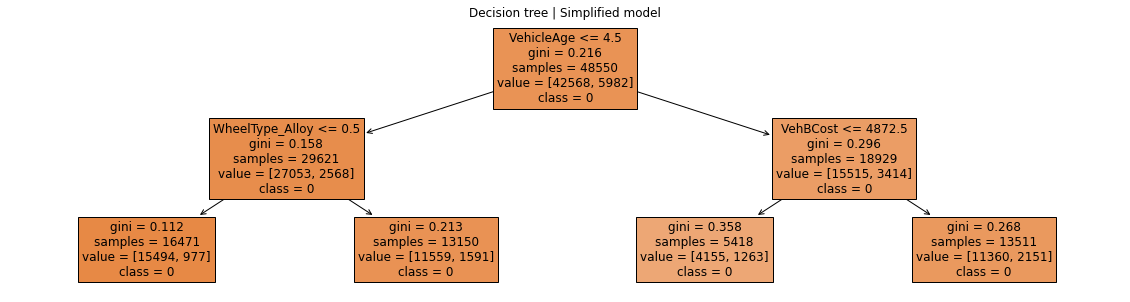

In [13]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Create a simple model with max_depth=2
simple_model = DecisionTreeClassifier(max_depth=2, random_state=42)

# Fit model to training set
simple_model.fit(X_train, y_train)

plt.figure(figsize=(20,5))
plot_tree(simple_model, filled=True, class_names=['0','1'], feature_names=X.columns, fontsize=12)
# plot_tree(simple_model, filled=True, class_names=['0','1'], feature_names=list(X.columns), fontsize=12) # use this line if you use a different scikit-learn version
plt.title('Decision tree | Simplified model')

The (root) nodes hold the information (The leaf holds all the information but the feature):

Feature Condition | Criterion | Number of Samples | Value | Class
--- | --- | --- | --- | ---
VehicleAge <= 4.5 | 0.216| 48550 | [42568, 5982] | 0


Let's investigate the first node:

The selected feature is VehicleAge, less than or equal to 4.5 years. The decision tree uses the gini impurity as a measure to choose the best split. Looking at the values of VehicleAge tells us the maximum is 9 years. So the first split is at the median of 4.5 years.

The [Gini impurity](https://scikit-learn.org/stable/modules/tree.html#classification-criteria) describes the probability of a randomly picked data set sample being incorrectly classified. The simplified example below has a termination criterion of max_depth=2; hence the leaves are not pure (meaning a gini impurity of 0.0). A leaf is pure if all its samples belong to the same class.

The number of samples is 48550. The value is the number of samples per class. The class is the class with the highest number of samples. In this case, it is class 0.

To illustrate this, consider this simple example with two classes - **moon** and **sun**. How likely is it that a randomly picked sample is classified as **moon**? The probability is 0.5. The same applies to the class **sun**. The Gini impurity is 0.5.


Case | Classification	|Probability
--- | --- | --- 
pick moon, classify moon | correct | 25%
pick moon, classify sun | incorrect |	25%
pick sun, classify moon | incorrect|	25%
pick sun, classify sun | correct |	25%

Back to our basic model:

For each node the decision path is displayed. To manipulate the decision path, the criterion, max_depth, max_features and further parameters can be set. See [Decision tree structure](https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py) for further information.

Text(0.5, 1.0, 'Decision tree trained on all data set features')

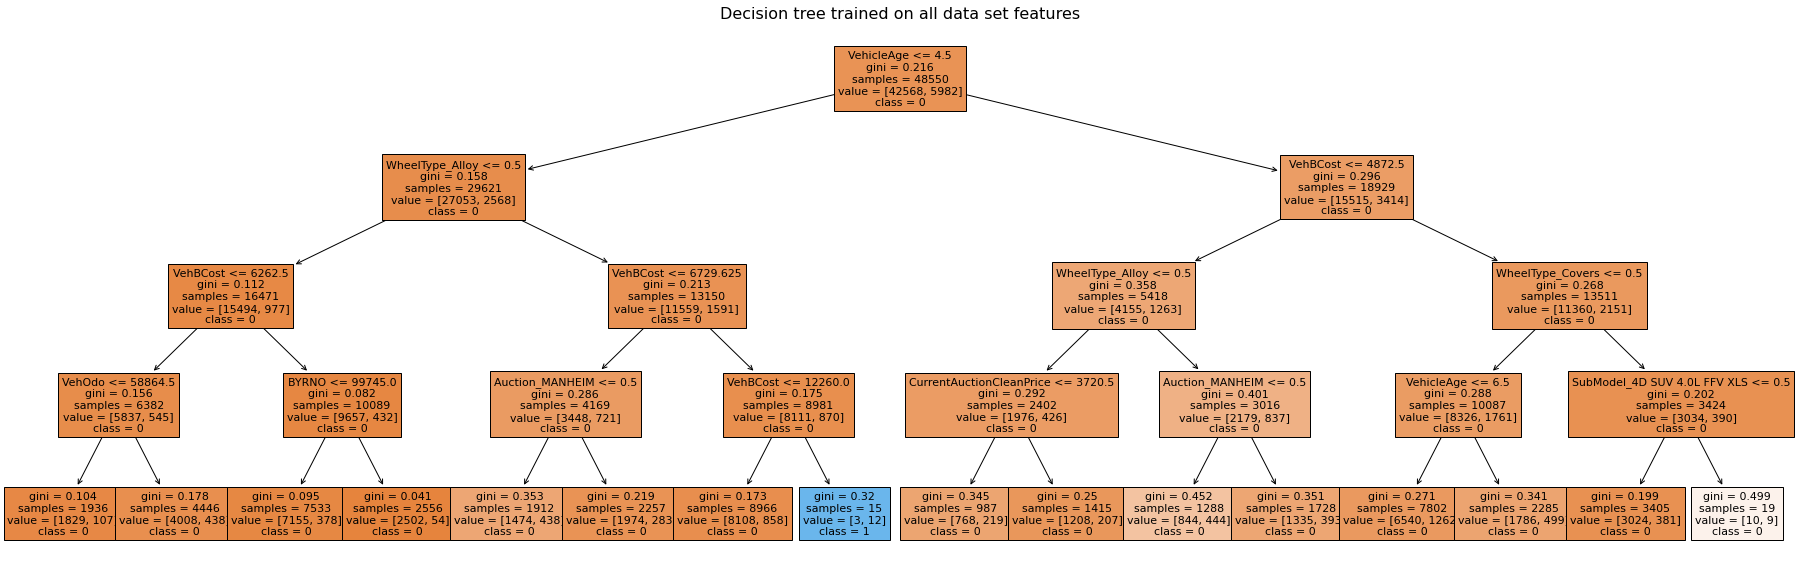

In [14]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(32,10)) # set the figure size
plot_tree(model, filled=True, class_names=['0','1'],feature_names=X.columns, fontsize=11) # plot the model, set filled to True for the colors and the feature names with X.columns
# plot_tree(model, filled=True, class_names=['0','1'],feature_names=list(X.columns), fontsize=11)  # use this line if you use a different scikit-learn version
plt.title('Decision tree trained on all data set features', fontsize=16)

It is immediately apparent that one color, i.e., a class, is underrepresented. Class 1 is represented by the color blue. 

This model's performance shows how well the model predicted the classes. However, this is different from the desired behavior. A model that is biased towards the majority class is not applicable. The model should be able to predict all classes well.

As noted in the EDA, the data set is imbalanced. The methods for manipulating an imbalanced data set follow in one of the [upcoming steps](#imbalanced-data-set). 

 > You trained a decision tree classifier and visualized the decision tree! Now you have an idea if the vehicle purchased was a good deal or not. But how can you be sure that the results are correct? 
 <br> So before you can present the results to your bosses, you need to look at the model's performance.

### Third step - Evaluation of the performance

Let's compute the `classification_report()` using the true labels (y_test) and the predicted labels (y_pred). 

The precision, recall and f1_score are explained [here](/supervised_learning/classification/k_nearest_neighbors/text/recall.md).

In [15]:
# Evaluate the model
from sklearn.metrics import classification_report

# Predictions on the test data by using the trained model
y_pred = model.predict(X_test)

target_names=['Class 0', 'Class 1']
print(classification_report(y_test, y_pred, target_names=target_names))
# print(classification_report(y_test, y_pred, target_names=target_names, digits=5))

              precision    recall  f1-score   support

     Class 0       0.88      1.00      0.93     20988
     Class 1       0.80      0.00      0.00      2926

    accuracy                           0.88     23914
   macro avg       0.84      0.50      0.47     23914
weighted avg       0.87      0.88      0.82     23914



So, let's break it down:

_Precision_: For class 0, the precision is 0.88, indicating that 88% of the predicted positive cases for class 0 were correct. For class 1, the precision is 0.80, meaning that 80% of the predicted positive cases for class 1 were correct.

_Recall_: For class 0, the recall is 0.99995 (print the report with 5 digits to see the digits), indicating that the model identified almost all of the actual positive cases for class 0. However, for class 1, the recall is 0.00137, meaning that the model failed to identify nearly all of the true positive cases for class 1. These are not of any great influence at all, since the false positives for class 1 are much higher. 

_F1-score_: For class 0, the F1-score is 0.93, reflecting a relatively good balance between precision and recall. However, for class 1, the F1-score is 0.00273, suggesting that the model's performance for class 1 is extremely poor.

_Support_: Support indicates the number of samples in each class. For class 0, there are 20,988 samples, while for class 1, there are 2,926 samples. The initial amount of samples in the data set is much higher, but the train-test-split() method reduced the number of samples.

_Accuracy_: The model's overall accuracy is 0.88, which indicates that it correctly predicted 88% of the samples in the data set.

_macro avg_: Macro average calculates the average of the metrics across classes, regardless of class imbalance. In this case, the macro average precision is 0.84, recall is 0.50, and F1-score is 0.47.

_weighted avg_: Weighted average calculates the average of the metrics, considering the support (number of samples) for each class. The weighted average precision is 0.87, recall is 0.88, and F1-score is 0.82.

<br>

An accuracy of 88% seems pretty good. The model performs well regarding precision, recall, and F1-score for class 0. But looking at the recall and f1-score for class 1 with low recall and F1-score indicates the model's difficulty correctly identifying positive cases for that class. The model did not really learn to predict class 1. The 'good' overall accuracy is misleading in this case. 
The goal is to predict class 1 (kick). So, let's explore how we can improve the model's performance.

-----------

#### Imbalanced data set

The manipulation of [imbalanced data](/Machine-Learning-OER-Basics-main/supervised_learning/images_text/explainer/data_sets.md) sets has an impact on the performance of the model. This tutorial uses the [RandomUnderSampler](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html) method to balance the data set. The method randomly selects samples from the majority class to match the minority class' number of samples. For different methods, see the [imbalanced-learn](https://imbalanced-learn.org/stable/references/index.html) documentation.

**RandomUnderSampler**

The RandomUnderSampler technique is used to balance the data by randomly selecting a subset of data for the targeted classes. The method is applied to the training data set. The test data set remains unchanged.


Let's apply the undersampling method to our data set. NOTE: The undersampling method should only be applied to the training data set. So we need to split the data set into training and test data set first. We use the same parameter we used in our basic model.

We name the split data set `X_train_rus, X_test_rus, y_train_rus, y_test_rus` for better distinction.

In [16]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X, y, test_size=0.33, random_state=42)

Consider the following parameter:
* `sampling_strategy='majority'` specifies that the majority class is undersampled to have the same number of samples as the minority class after resampling
* The parameter `random_state=42` ensures that the results are reproducible.

We import the `RandomUnderSampler()` method from the `imblearn.under_sampling` library and assign the method to the variable rus. 

In [17]:
# Import randomundersampler
from imblearn.under_sampling import RandomUnderSampler

# Instantiate RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy='majority', random_state=42)

Now we call the method `fit_resample()` on the training data set. The method returns the resampled data set and the resampled labels. We assign the resampled data set to the variable X_train_res and the resampled labels to the variable y_train_res.

In [18]:
# Fit the model to the training set
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_rus, y_train_rus)

from collections import Counter
print(f'Original data set shape {Counter(y_train)}')
print(f'Resampled data set shape {Counter(y_train_resampled)}')

Original data set shape Counter({0: 42568, 1: 5982})
Resampled data set shape Counter({0: 5982, 1: 5982})


Classes 0 and 1 are now equally represented in the training set.

Let's train the model again with the undersampled data set and the same parameter settings. We name it rus_model.

In [19]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate DecisionTreeClassifier
rus_model = DecisionTreeClassifier(max_depth=4, random_state=42)

# Fit model to training set
rus_model.fit(X_train_resampled, y_train_resampled)

# Predict test set labels
y_pred_rus = rus_model.predict(X_test_rus)

In [20]:
# Evaluate the model
from sklearn.metrics import classification_report

# Predictions on the test data by using the trained model
y_pred_rus = rus_model.predict(X_test_rus) # create variable predicted labels (y_pred_rus)

target_names=['Class 0', 'Class 1']
print(classification_report(y_test_rus, y_pred_rus, target_names=target_names)) # Taking into account the true labels (y_test_rus) and the predicted labels (y_pred_rus)
# print(classification_report(y_test_rus, y_pred_rus, target_names=target_names, digits=5))

              precision    recall  f1-score   support

     Class 0       0.93      0.57      0.71     20988
     Class 1       0.19      0.71      0.29      2926

    accuracy                           0.59     23914
   macro avg       0.56      0.64      0.50     23914
weighted avg       0.84      0.59      0.66     23914




The RandomUnderSampler randomly selects a subset of data from the majority class (Class 0) to match the number of instances in the minority class (Class 1). By doing so, it aims to balance the class distribution in the data set. However, in this case, the undersampling process might have removed some important instances from class 0 that were correctly classified before.

As a result, the recall, and F1-score for class 0 have decreased after applying the RandomUnderSampler, indicating a decline in the model's performance in predicting instances of class 0. It's important to note that undersampling can sometimes lead to information loss, and the data set's specific characteristics may influence the technique's effectiveness.

Depending on your objective, if preserving the predictive performance for class 0 is crucial, consider exploring other techniques.

*******

Our first goal is to predict whether the vehicle the company buys is a kick.  
It is, therefore, essential to reduce the likelihood that a kick will be incorrectly labeled as no kick.
We accept the potential for a no kick to be misclassified as a kick.
False positives can occur, but false negatives are not wanted. The focus is on the recall, which should be reasonably high. 
The recall for class 1 has increased with the RandomUnderSampler. This is precisely what we want. 

Try to improve the model's performance by changing the parameters with reasonable values. Look at the outliers again or try to change the train-test-split() method.
There are varied methods you can use for improvement to cover dimensionality reduction, feature selection or feature engineering.
Always remember that a small change in the data can lead to a completely different tree.

Let's briefly recap before we move on and see how another model performs. 
The advantage of a decision tree is that it is easy to interpret. You can look at the structure and see how the model works, so it's not a black box. It is fast and can handle both numerical and categorical data. However, it is prone to overfitting and can create complex trees. And as we have seen, the prediction accuracy is low.

But luckily, there are other models to try out. So before you present the results, let's see how the [Random Forest classifier](/supervised_learning/classification/ensemble_methods/random_forest/code/random_forest_classifier_tutorial.ipynb) performs.


**********

What else can you try doing to improve the model's performance? Here are some ideas:

- You can read more about overfitting [here](/supervised_learning/classification/k_nearest_neighbors/text/overfitting_underfitting.md).
- You can find more information about pruning [here](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#post-pruning-decision-trees-with-cost-complexity-pruning).